# Détection de fraude en Machine Learning

Librairies

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix

Base de données

In [17]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62,0
1,0.0,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69,0
2,1.0,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,...,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66,0
3,1.0,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,...,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50,0
4,2.0,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,...,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99,0


### Analyse des données

In [18]:
set_option('precision', 5)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,...,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,284807.00000,284807.00000
mean,94813.85958,3.91865e-15,5.68269e-16,-8.76174e-15,2.81112e-15,-1.55210e-15,2.04013e-15,-1.69895e-15,-1.89329e-16,-3.14764e-15,...,1.47312e-16,8.04211e-16,5.28251e-16,4.45627e-15,1.42690e-15,1.70164e-15,-3.66225e-16,-1.21781e-16,88.34962,0.00173
std,47488.14595,1.95870e+00,1.65131e+00,1.51626e+00,1.41587e+00,1.38025e+00,1.33227e+00,1.23709e+00,1.19435e+00,1.09863e+00,...,7.34524e-01,7.25702e-01,6.24460e-01,6.05647e-01,5.21278e-01,4.82227e-01,4.03632e-01,3.30083e-01,250.12011,0.04153
min,0.00000,-5.64075e+01,-7.27157e+01,-4.83256e+01,-5.68317e+00,-1.13743e+02,-2.61605e+01,-4.35572e+01,-7.32167e+01,-1.34341e+01,...,-3.48304e+01,-1.09331e+01,-4.48077e+01,-2.83663e+00,-1.02954e+01,-2.60455e+00,-2.25657e+01,-1.54301e+01,0.00000,0.00000
25%,54201.50000,-9.20373e-01,-5.98550e-01,-8.90365e-01,-8.48640e-01,-6.91597e-01,-7.68296e-01,-5.54076e-01,-2.08630e-01,-6.43098e-01,...,-2.28395e-01,-5.42350e-01,-1.61846e-01,-3.54586e-01,-3.17145e-01,-3.26984e-01,-7.08395e-02,-5.29598e-02,5.60000,0.00000
50%,84692.00000,1.81088e-02,6.54856e-02,1.79846e-01,-1.98465e-02,-5.43358e-02,-2.74187e-01,4.01031e-02,2.23580e-02,-5.14287e-02,...,-2.94502e-02,6.78194e-03,-1.11929e-02,4.09761e-02,1.65935e-02,-5.21391e-02,1.34215e-03,1.12438e-02,22.00000,0.00000
75%,139320.50000,1.31564e+00,8.03724e-01,1.02720e+00,7.43341e-01,6.11926e-01,3.98565e-01,5.70436e-01,3.27346e-01,5.97139e-01,...,1.86377e-01,5.28554e-01,1.47642e-01,4.39527e-01,3.50716e-01,2.40952e-01,9.10451e-02,7.82800e-02,77.16500,0.00000
max,172792.00000,2.45493e+00,2.20577e+01,9.38256e+00,1.68753e+01,3.48017e+01,7.33016e+01,1.20589e+02,2.00072e+01,1.55950e+01,...,2.72028e+01,1.05031e+01,2.25284e+01,4.58455e+00,7.51959e+00,3.51735e+00,3.16122e+01,3.38478e+01,25691.16000,1.00000


La colonne Class nous donne l'informations : Not Fraud 1/ Fraud 0

In [19]:
class_names = {0:'Not Fraud', 1:'Fraud'}
rvs = data.Class.value_counts().rename(index = class_names)
print(rvs)

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


### Préparation de nos variable et paramètres

In [20]:
X = df.drop(columns =['Class'])
Y = df['Class']

Y = np.array(Y)
Y = np.reshape(Y, (284807, 1))

X = np.array(X)
X = np.reshape(X, (284807, 30))

print(X.shape)
print(Y.shape)

(284807, 30)
(284807, 1)


Séparer train et test set

In [21]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(199364, 30) (42721, 30) (42722, 30) (199364, 1) (42721, 1) (42722, 1)


# Modèle

### Regression Logistique

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logisreg = LogisticRegression()

logisreg.fit(X_train, Y_train)

y_pred = logisreg.predict(X_test)
acc_logisreg = round( accuracy_score(Y_test, y_pred) * 100, 2 )

D:\ALGO\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Linear Discriminent Analysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

acc_lda = round( accuracy_score(Y_test, y_pred) * 100, 2 )

D:\ALGO\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

acc_ganb = round( accuracy_score(Y_test, y_pred) * 100, 2 )

D:\ALGO\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

acc_dtree = round( accuracy_score(Y_test, y_pred) * 100, 2 )

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier


model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

y_pred = model1.predict(X_test)

acc_rf = round( accuracy_score(Y_test, y_pred) * 100, 2 )

<ipython-input-32-88a20ad35ab5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train, Y_train)


### Support Vecteur Machine

In [28]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

acc_svc = round( accuracy_score(Y_test, y_pred) * 100, 2 )

D:\ALGO\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

acc_knn = round( accuracy_score(Y_test, y_pred) * 100, 2 )

D:\ALGO\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Comparaison des scores

In [30]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes',
              'Decision Tree', 'Random Forest', 'Support Vector Machines', 'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,99.96
6,K - Nearest Neighbors,99.95
1,Linear Discriminant Analysis,99.94
5,Support Vector Machines,99.94
3,Decision Tree,99.91
0,Logistic Regression,99.89
2,Naive Bayes,97.85


Matrice de confusion du Random Forest

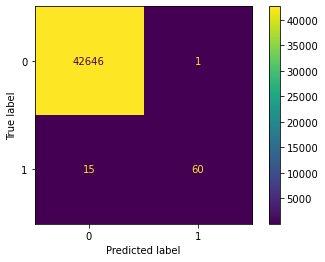

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, Y_test);